# Contents: Data Analysis

1. Environment Setup
2. Basic Statistics
3. Exploratory Analysis
4. Linear Regression
5. K-means Clustering

### 1. Environment Setup

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Import data sets
path = r'C:\Users\felix\Documents\PSU\class\NBA'

player = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'common_player_info_wrangled.csv'), index_col = False)

In [3]:
# Makes sures charts created are displayed in notebook w/o needing to be called
%matplotlib inline

### 2. Basic Statistics

In [4]:
player.head()

,person_id,first_name,last_name,display_first_last,birthdate,school,country,height_inches,weight,season_exp,...,games_played_current_season_flag,from_year,to_year,dleague_flag,nba_flag,games_played_flag,draft_year,draft_round,draft_number,greatest_75_flag
0,51,Mahmoud,Abdul-Rauf,Mahmoud Abdul-Rauf,3/9/1969,Louisiana State,USA,73.0,162.0,9,...,N,1990,2000,N,Y,Y,1990,1,3,N
1,1505,Tariq,Abdul-Wahad,Tariq Abdul-Wahad,11/3/1974,San Jose State,France,78.0,235.0,7,...,N,1997,2003,N,Y,Y,1997,1,11,N
2,76007,John,Abramovic,John Abramovic,2/9/1919,Salem,USA,75.0,195.0,2,...,N,1946,1947,N,Y,Y,Undrafted,0,0,N
3,203112,Quincy,Acy,Quincy Acy,10/6/1990,Baylor,USA,79.0,240.0,7,...,N,2012,2018,Y,Y,Y,2012,2,37,N
4,200801,Hassan,Adams,Hassan Adams,6/20/1984,Arizona,USA,76.0,220.0,2,...,N,2006,2008,N,Y,Y,2006,2,54,N


In [5]:
player.shape

(2457, 22)

In [6]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2457 entries, 0 to 2456
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   person_id                         2457 non-null   int64  
 1   first_name                        2457 non-null   object 
 2   last_name                         2457 non-null   object 
 3   display_first_last                2457 non-null   object 
 4   birthdate                         2457 non-null   object 
 5   school                            2457 non-null   object 
 6   country                           2457 non-null   object 
 7   height_inches                     2457 non-null   float64
 8   weight                            2457 non-null   float64
 9   season_exp                        2457 non-null   int64  
 10  position                          2457 non-null   object 
 11  rosterstatus                      2457 non-null   object 
 12  games_

In [7]:
player.describe()

,person_id,height_inches,weight,season_exp,from_year,to_year,draft_round,draft_number
count,2.457000e+03,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000,2457.000000
mean,3.389107e+05,78.051271,211.014190,5.120879,1989.650387,1994.021571,1.564103,23.739113
std,5.837598e+05,3.536840,26.167087,4.509179,22.622690,23.166283,1.856206,28.622144
min,3.000000e+00,66.000000,133.000000,0.000000,1946.000000,1946.000000,0.000000,0.000000
25%,7.621100e+04,75.000000,190.000000,2.000000,1974.000000,1978.000000,0.000000,0.000000
50%,7.787600e+04,78.000000,210.000000,3.000000,1992.000000,1998.000000,1.000000,16.000000
75%,2.023220e+05,81.000000,229.000000,8.000000,2010.000000,2015.000000,2.000000,37.000000
max,1.631466e+06,91.000000,325.000000,23.000000,2022.000000,2022.000000,20.000000,221.000000


### 3. Exploratory Analysis

In [8]:
# dropping person_id and birthdate, as they won't be used for our exploratory analysis

player2 = player[['height_inches', 'weight', 'season_exp', 'from_year', 'to_year', 'draft_round', 'draft_number']]

In [9]:
player2.corr()

,height_inches,weight,season_exp,from_year,to_year,draft_round,draft_number
height_inches,1.000000,0.818633,0.147030,0.249856,0.272793,-0.027191,0.014274
weight,0.818633,1.000000,0.186432,0.310892,0.338082,-0.095839,-0.045141
season_exp,0.147030,0.186432,1.000000,0.025285,0.215480,-0.063072,-0.088267
from_year,0.249856,0.310892,0.025285,1.000000,0.979444,-0.260754,-0.063367
to_year,0.272793,0.338082,0.215480,0.979444,1.000000,-0.266391,-0.079690
draft_round,-0.027191,-0.095839,-0.063072,-0.260754,-0.266391,1.000000,0.873277
draft_number,0.014274,-0.045141,-0.088267,-0.063367,-0.079690,0.873277,1.000000


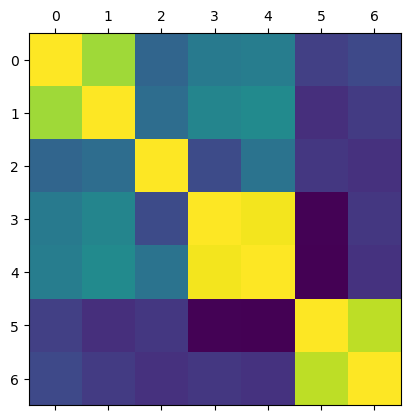

In [10]:
# correlation matrix

plt.matshow(player2.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

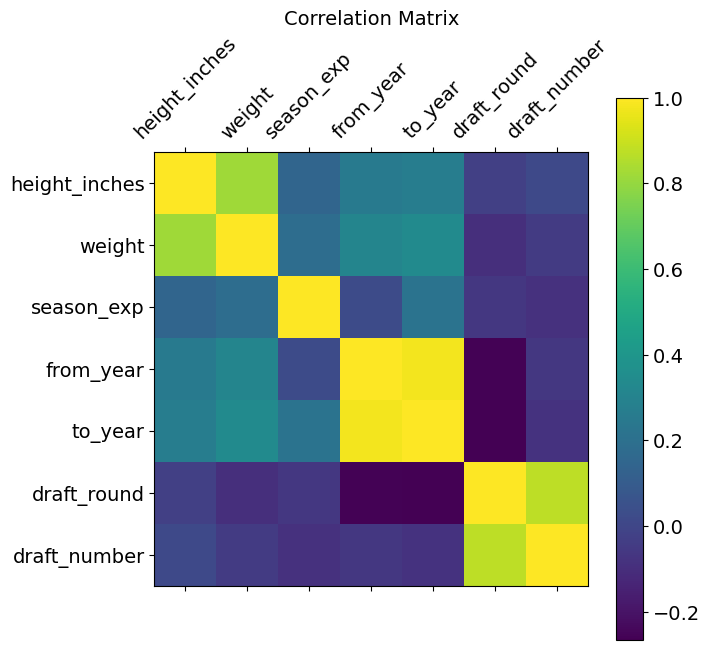

In [11]:
# Adding labels, a legend, and changing the size of the heatmap

f = plt.figure(figsize=(7, 7)) # figure size 
plt.matshow(player2.corr(), fignum=f.number) # type of plot
plt.xticks(range(player2.shape[1]), player2.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(player2.shape[1]), player2.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

The coefficients in the plot refer to the strength of the correlation between the two variables. The brightest squares refer to the strongest correlations, while the darkest squares in our matrix refers to almost no correlation. It makes sense that each variable is correlated with itself, but after that we can see that only height_inches and weight, from_year and to_year, and draft_round and draft_number are strongly correlated. This may have more to do with the type of value these variables are holding though.

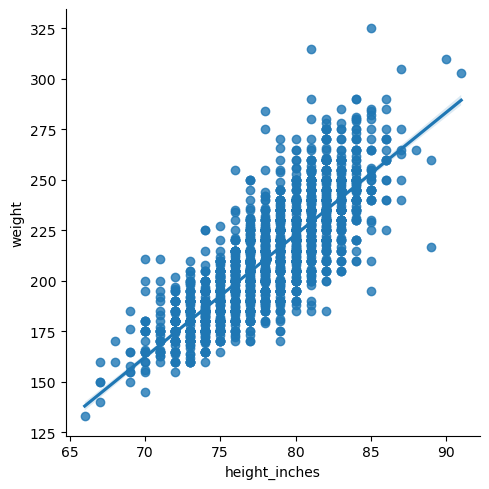

In [12]:
# scatterplot

scatter = sns.lmplot(x = 'height_inches', y = 'weight', data = player2)

From our scatterplot we can see that the plot for height_inches and weight is normal, with there being lots of values and good variation.

### 4. Linear Regression

In [13]:
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\felix\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height_inches', ylabel='Density'>

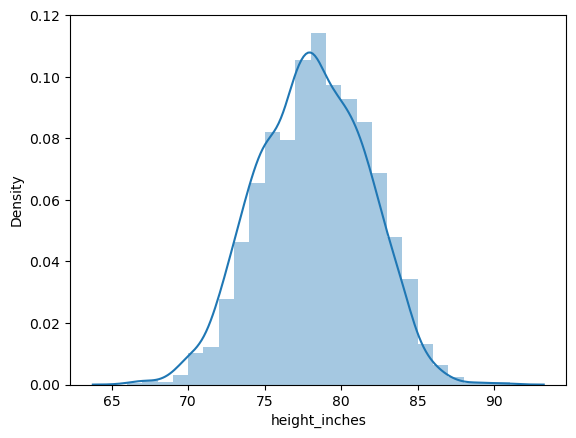

In [14]:
#shows extreme values

sns.distplot(player['height_inches'], bins=25)

C:\Users\felix\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

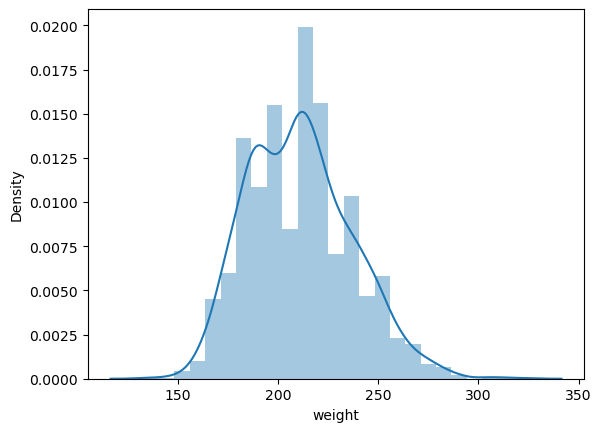

In [15]:
sns.distplot(player['weight'], bins=25)

### Regression Prep

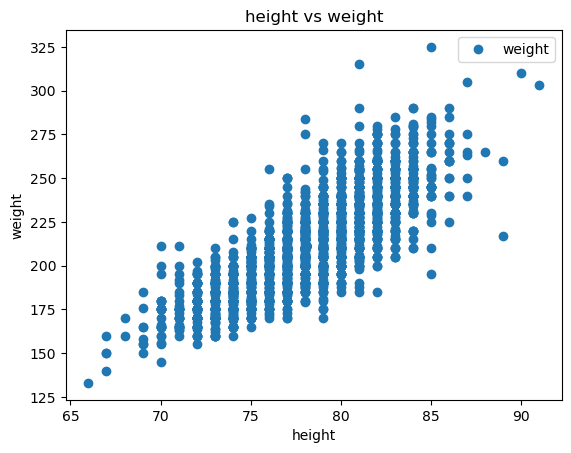

In [16]:
# The style option creates a scatterplot; without it, we only have lines.

player.plot(x = 'height_inches', y='weight',style='o')
plt.title('height vs weight')  
plt.xlabel('height')  
plt.ylabel('weight')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = player['height_inches'].values.reshape(-1,1)
y = player['weight'].values.reshape(-1,1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Regression Analysis

Hypothesis: As the height of an NBA player goes up, their weight also goes up.

In [19]:
regression = LinearRegression()

In [20]:
regression.fit(X_train, y_train)

LinearRegression()

In [21]:
y_predicted = regression.predict(X_test)

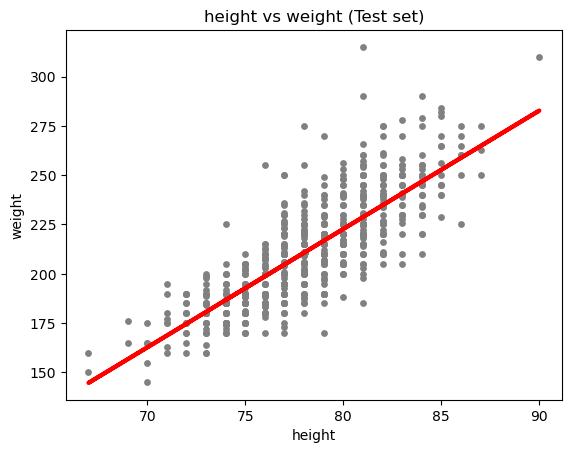

In [22]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('height vs weight (Test set)')
plot_test.xlabel('height')
plot_test.ylabel('weight')
plot_test.show()

From this graph, there is a good line of fit for the data. The data points are relatively close to the line, and the points all follow the general trend of the line.

In [23]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6.0025004]]
Mean squared error:  234.10742002188266
R2 score:  0.6662333112257233


In [25]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,185.0,186.718119
1,185.0,198.723120
2,240.0,234.738122
3,173.0,204.725620
4,245.0,222.733121
5,190.0,204.725620
6,256.0,222.733121
7,240.0,252.745623
8,185.0,186.718119
9,210.0,240.740623


The R2 score for this linear regression is pretty confident at 67%. While it's not perfect, given that many NBA players have different body types (and thus weights) in order to fulfill their roles in the league, it would still be okay to say that this model is pretty good for the case study. The MSE being so big makes sense in this context, given that every person has their own height and weight, and those can't be perfectly predicted in any world.

For the height vs weight model, some data bias could come in the form of roles. Centers for example tend to be taller and heavier because they need to be strong enough to absorb contact from other players and tall enough to block shots. If the players could be separated by position there could be an interesting difference in height vs weight, but the sample size could also end up being small enough that a model wouldn't have enough data to accurately predict anything.

### 5. K-means Clustering

In [26]:
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [27]:
player3 = player[['height_inches', 'weight', 'season_exp', 'to_year', 'draft_number']]

In [28]:
# Elbow Technique

num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [29]:
# Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(player3).score(player3) for i in range(len(kmeans))]

score

C:\Users\felix\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.
  warnings.warn(


[-5092422.938054285,
 -3641398.8016667436,
 -2666679.131593053,
 -2052568.7283113203,
 -1716652.6283300135,
 -1539783.5243236788,
 -1388827.8440259385,
 -1240282.227724711,
 -1123321.6590845627]

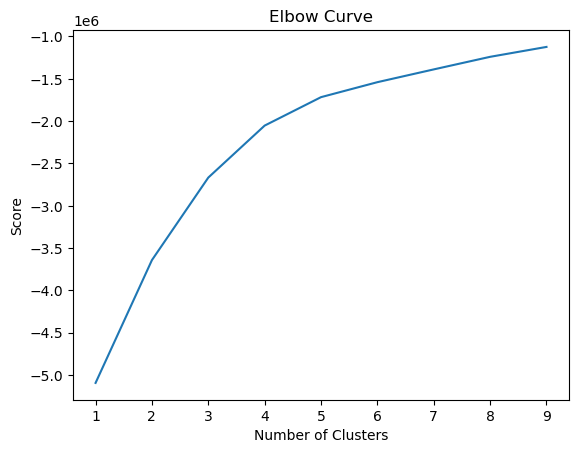

In [30]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

From this elbow curve, 4 or 5 clusters would be the ideal number to use in the case study. This is because around 4 is where the curve starts to flatten out, but there's still enough of an increase at 5 to argue using it, plus with knowledge of basketball having 5 players at 5 different positions on the court, it's feasible to create 5 clusters here.

In [31]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5)

In [32]:
# Fit the k-means object to the data.

kmeans.fit(player3)

KMeans(n_clusters=5)

In [33]:
player3['clusters'] = kmeans.fit_predict(player3)

C:\Users\felix\AppData\Local\Temp\ipykernel_9684\3854304664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player3['clusters'] = kmeans.fit_predict(player3)


In [34]:
player3.head()

,height_inches,weight,season_exp,to_year,draft_number,clusters
0,73.0,162.0,9,2000,3,1
1,78.0,235.0,7,2003,11,4
2,75.0,195.0,2,1947,0,0
3,79.0,240.0,7,2018,37,4
4,76.0,220.0,2,2008,54,3


In [35]:
player3['clusters'].value_counts()

1    682
4    612
0    557
3    484
2    122
Name: clusters, dtype: int64

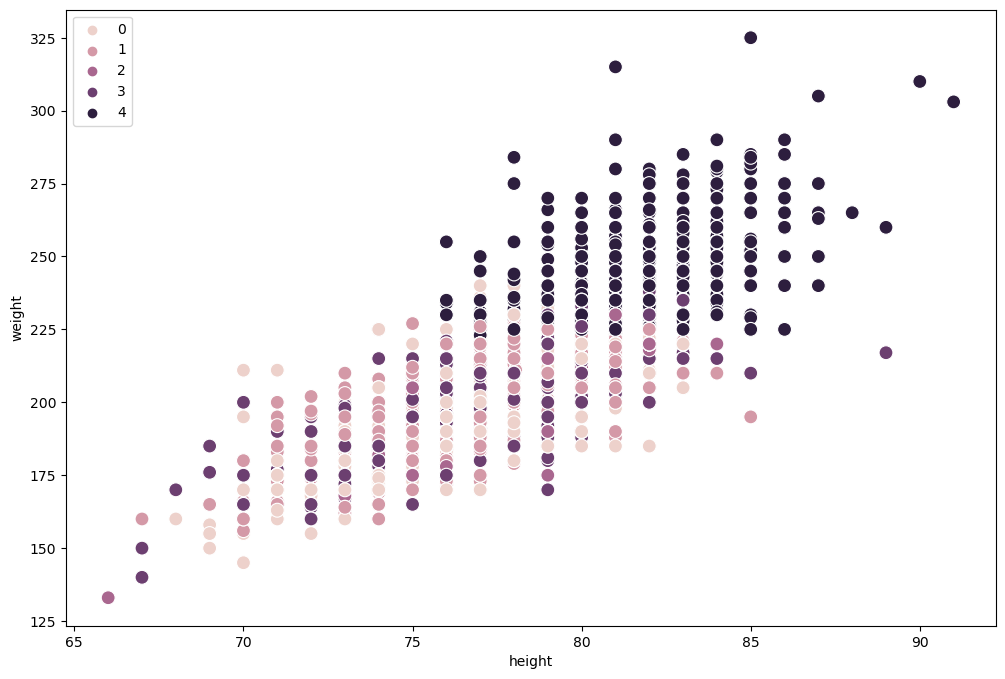

In [36]:
# Plot the clusters for the "height" and "weight" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=player3['height_inches'], y=player3['weight'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('height') # Label x-axis.
plt.ylabel('weight') # Label y-axis.
plt.show()

In this graph height by weight was plotted to see if a distinction could be made between the roles players play in the NBA and the body types of each role. From what this graph depicts is that there is more than just body type that determines which role someone plays. While certain body types may trend more towards certain roles, overall there is too much overlap to easily judge this. The clusters are too hard to differentiate here.

In [38]:
# dividing the clusters by the color they show up as on the previous chart

player3.loc[player3['clusters'] == 4, 'cluster'] = 'dark purple'
player3.loc[player3['clusters'] == 3, 'cluster'] = 'purple'
player3.loc[player3['clusters'] == 2, 'cluster'] = 'dark pink'
player3.loc[player3['clusters'] == 1, 'cluster'] = 'pink'
player3.loc[player3['clusters'] == 0, 'cluster'] = 'peach'

C:\Users\felix\AppData\Local\Temp\ipykernel_9684\4138800723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player3.loc[player3['clusters'] == 4, 'cluster'] = 'dark purple'


In [39]:
player3.groupby('cluster').agg({'height_inches':['mean', 'median'], 
                         'weight':['mean', 'median'], 
                         'season_exp':['mean', 'median'],
                         'draft_number':['mean', 'median'],
                         'to_year':['mean', 'median']})

height_inches             weight        season_exp         \
                     mean median        mean median       mean median   
cluster                                                                 
dark pink       77.582387   78.0  201.959133  200.0   3.385246    2.0   
dark purple     81.683007   82.0  245.130719  241.5   6.821895    5.5   
peach           76.040142   76.0  194.813540  193.0   3.904847    2.0   
pink            76.928077   77.0  201.279383  205.0   5.483871    4.0   
purple          77.474412   78.0  202.518947  205.0   4.295455    3.0   

            draft_number             to_year          
                    mean median         mean  median  
cluster                                               
dark pink     112.836066  100.5  1979.475410  1980.0  
dark purple    18.555556   16.0  2007.217320  2009.0  
peach          11.091562    7.0  1961.522442  1959.0  
pink            7.274194    0.0  2010.325513  2014.0  
purple         45.590909   45.0  1995.429752  1993.5

The to_year statistics is pretty meaningless, as it's a measure of time. Draft number is also kind of meaningless, since it's heavily weighted towards the lower end but there's still some value in it. Height, weight and season exp are where we really want to look, and it's interesting to see how the clusters differ from each other. Dark purple, the first cluster seems to have by far the biggest (and heaviest) players, who stay in the league on average longer than everyone else yet are not as heavily prioritized in the draft. All the other positions have a lower average season_exp, which tells us that it is harder for smaller players to stay in the league without continuous improvement to oneself.

In [40]:
# player2.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'playerinfo_cluster.csv'))